# Exploratory Data Analysis On CarDekho Dataset

# Importing required libraries

In [41]:
import pandas as pd 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import re
import warnings 
warnings.filterwarnings('ignore')

# Loading the dataset using pandas

In [42]:
df = pd.read_csv(r"C:\Users\Venkat Sri Prasad\Downloads\Car details v3.csv")
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [4]:
del df['torque']
#Removing Torque because the data is so inconsistent

# Removing Special Characters in Columns 

In [5]:
a = df.columns[df.isnull().any()]
for i in a:
    df[i] = df[i].replace(r'[^\d.]+', '',regex=True)
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5,1197,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8,1493,110,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3,1248,73.9,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396,70,5.0


# Converting String DataTypes into Float dataTypes 

In [6]:

for i in a:
    df[i] = df[i].fillna(0)
    df[i] = df[i].replace("",'0')
    
b = df.select_dtypes(include=['int64', 'float64']).columns
df[a] = df[a].astype(float)
print(df.dtypes)

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
seats            float64
dtype: object


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        8128 non-null   float64
 9   engine         8128 non-null   float64
 10  max_power      8128 non-null   float64
 11  seats          8128 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 762.1+ KB


In [8]:
df.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,8128.000000,8.128000e+03,8.128000e+03,8128.000000,8128.000000,8128.000000,8128.000000
mean,2013.804011,6.382718e+05,6.981951e+04,18.890787,1418.965059,89.085848,5.269439
std,4.044249,8.062534e+05,5.655055e+04,5.082403,550.735342,38.286222,1.293039
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.395000,1196.000000,67.100000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.100000,1248.000000,81.860000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.277500,1582.000000,101.250000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


# Replacing the Null Values with Median Values

In [9]:


b = df.select_dtypes(include=['int64', 'float64']).columns
c=[]
for i in b:
    df[i]=df[i].replace(0,df[i].median())
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,5.0


# NO NULL Values

In [43]:
df.isnull().sum()


name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

# Creating 'Brand' column for differentiating Car brand

In [11]:
values = df['name'].str.split(" ").str[0]
df.rename(columns = {'name': 'Car_name'},inplace = True)
df.insert(1,"Brand",values)
df

,Car_name,Brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,Skoda,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,Honda,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,Maruti,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,Hyundai,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,Hyundai,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0
8125,Maruti Swift Dzire ZDi,Maruti,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,5.0
8126,Tata Indigo CR4,Tata,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,5.0


# Checking Outliers and Dropping respective rows

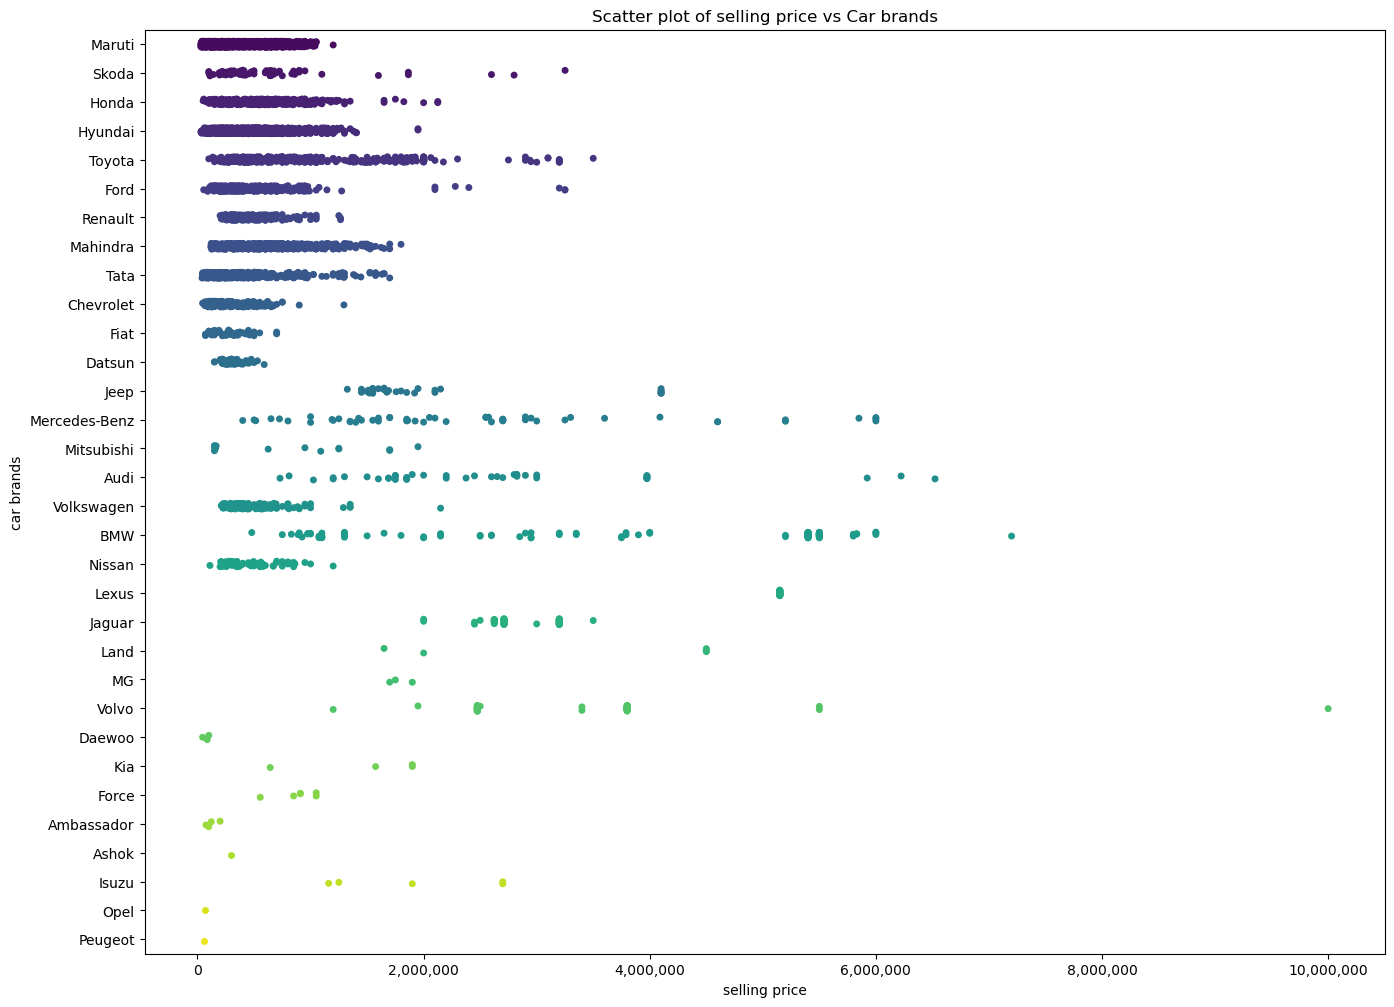

In [13]:
plt.figure(figsize=(16,12))
sns.stripplot(y='Brand', x='selling_price', data=df, jitter=True, palette='viridis')
plt.title("Scatter plot of selling price vs Car brands")
plt.xlabel("selling price")
plt.ylabel("car brands")
plt.gca().xaxis.set_major_formatter(ticker.FunFormatter(lambda x, _: format(int(x), ',')))
plt.show()

In [14]:
index_to_drop = df[df['selling_price']>7000000].index
df.drop(index_to_drop,inplace = True)

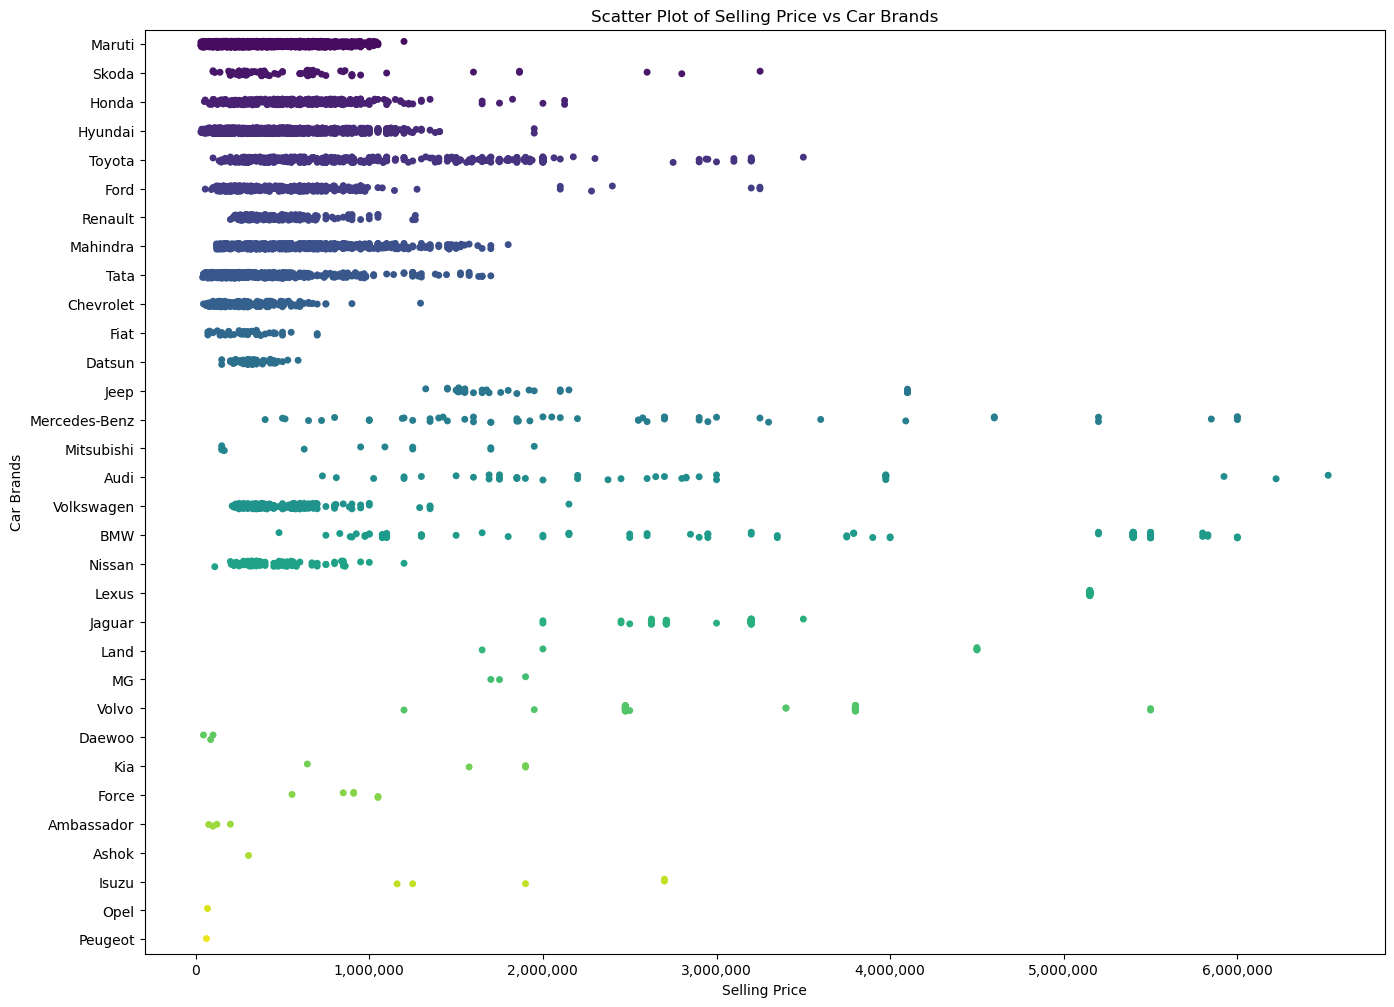

In [15]:
plt.figure(figsize=(16, 12))
sns.stripplot(y='Brand', x='selling_price', data=df, jitter=True, palette='viridis')
plt.title("Scatter Plot of Selling Price vs Car Brands")
plt.xlabel("Selling Price")
plt.ylabel("Car Brands")
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: format(int(x), ',')))
plt.show()

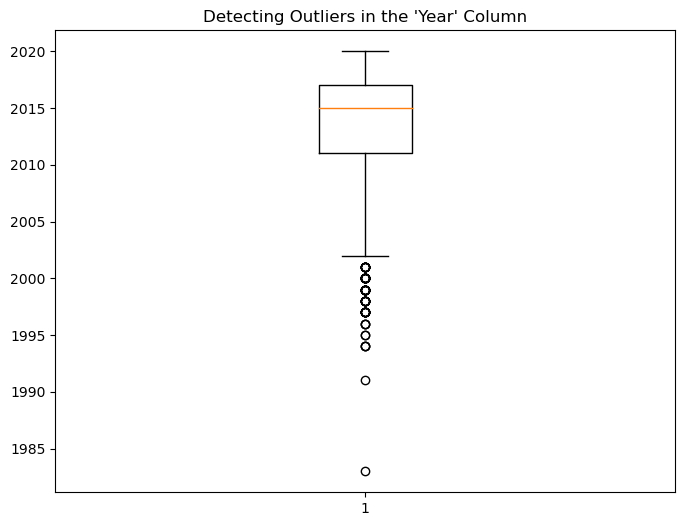

In [16]:
plt.figure(figsize=(8,6))
plt.boxplot(df.year)
plt.title("Detecting Outliers in the 'Year' Column")
plt.show()

In [17]:
d_ind = df[df['year']<2002].index
df.drop(d_ind,inplace = True)

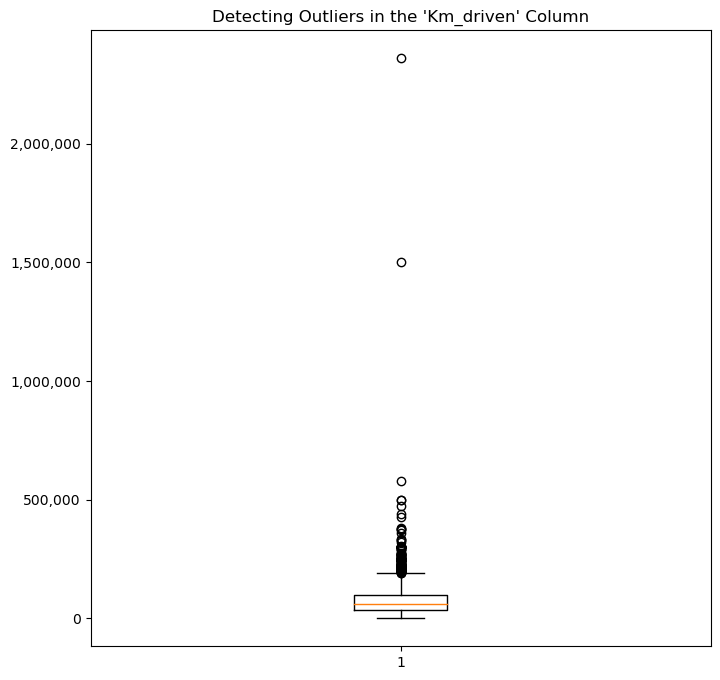

In [18]:
plt.figure(figsize=(8,8))
plt.boxplot(df.km_driven)
plt.title("Detecting Outliers in the 'Km_driven' Column")
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: format(int(x), ',')))
plt.show()

In [24]:
d_ind = df[df['km_driven']>200000].index
df.drop(d_ind,inplace = True)

# Checking If Selling price vary by mileage of the Car

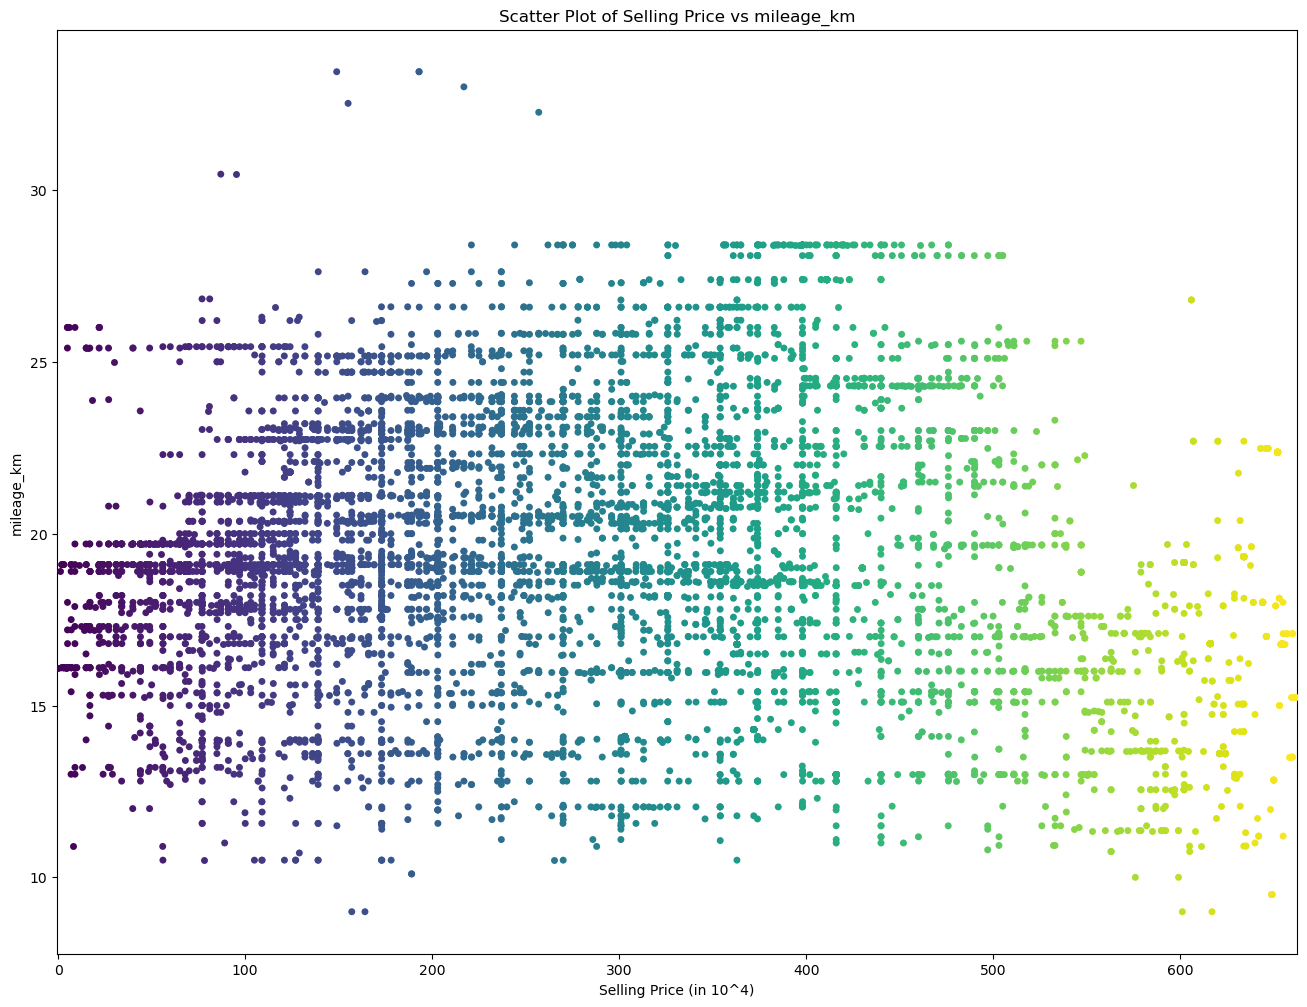

In [23]:
plt.figure(figsize=(16, 12))
sns.stripplot(y='mileage', x='selling_price', data=df, jitter=True, palette='viridis')
plt.xscale('linear')
plt.title("Scatter Plot of Selling Price vs mileage_km")
plt.xlabel("Selling Price (in 10^4)")
plt.ylabel("mileage_km")
plt.show()

# Percentage of Number of Cars respective to Year built

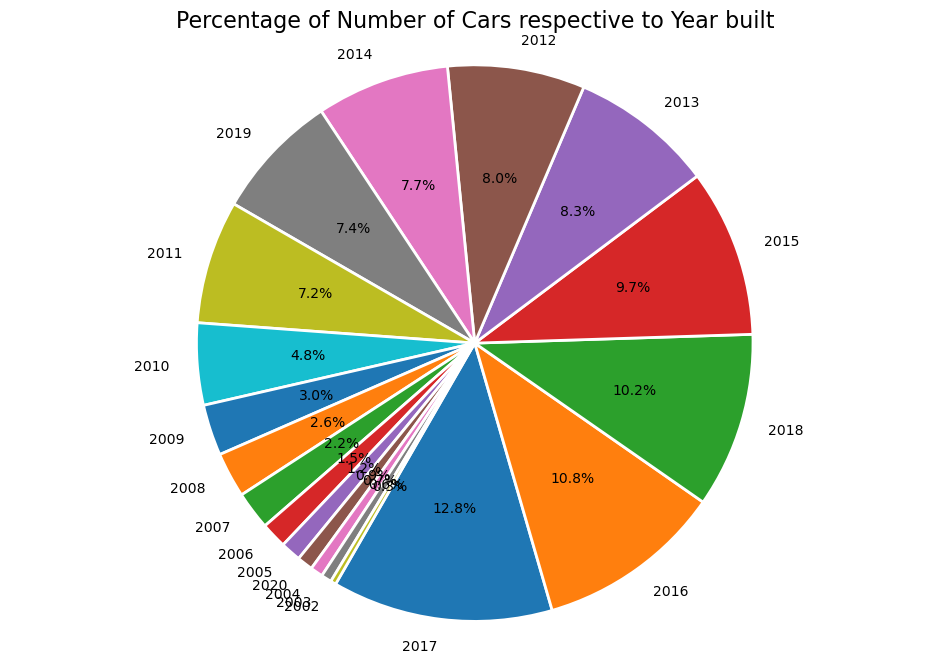

In [25]:
year_counts = df['year'].value_counts()
total_years = len(df)
percentages = (year_counts / total_years) * 100
plt.figure(figsize=(12, 8))
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=240,
        wedgeprops={'linewidth': 2, 'edgecolor': 'white'})

plt.title("Percentage of Number of Cars respective to Year built", fontsize=16)
plt.axis('equal')
plt.show()

# Countplot of each type of Owner category

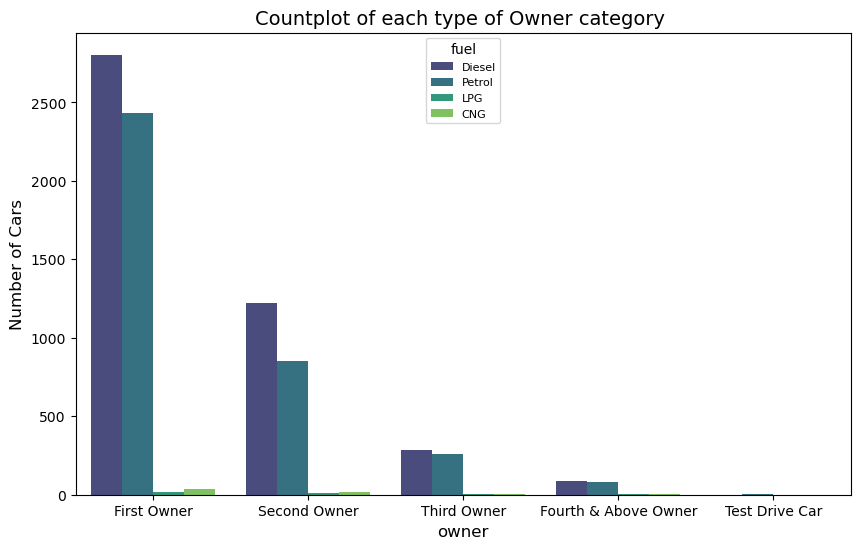

In [44]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x = 'owner', hue='fuel', palette='viridis')
plt.xlabel("owner", fontsize=12)
plt.ylabel("Number of Cars", fontsize=12)
plt.title("Countplot of each type of Owner category ", fontsize=14)
plt.legend(title='fuel', title_fontsize=10, fontsize=8)
plt.show()

# Checking If Selling Price vary by Brand

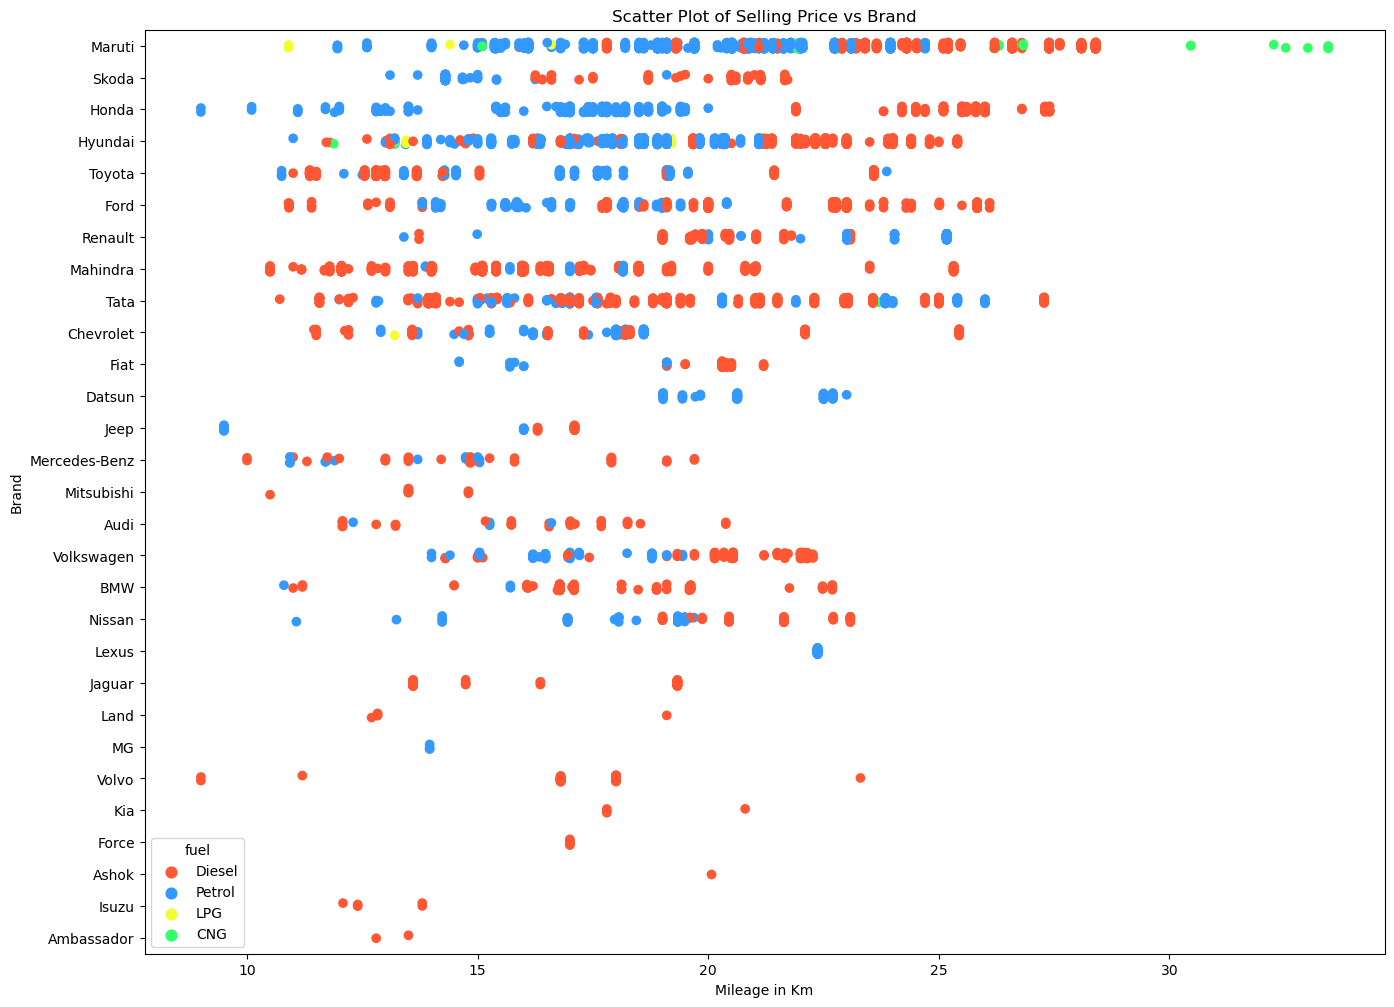

In [28]:
plt.figure(figsize=(16, 12))
custom_palette = ["#FF5733","#3399FF","#F1FF33","#33FF66"]
sns.stripplot(y='Brand', x='mileage', data=df, jitter=True, palette = custom_palette,hue='fuel',size = 7)
plt.xscale('linear')
plt.title("Scatter Plot of Selling Price vs Brand")
plt.xlabel("Mileage in Km")
plt.ylabel("Brand")
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: format(int(x), ',')))
plt.show()

# Correlation between the Columns and dropping if highly Correlated

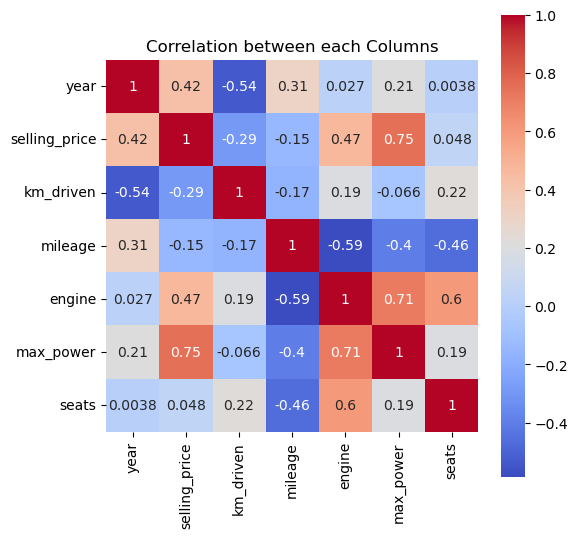

In [29]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm',robust = True,square = True)
plt.title('Correlation between each Columns')
plt.show()

#  Average Selling Price by each Brand

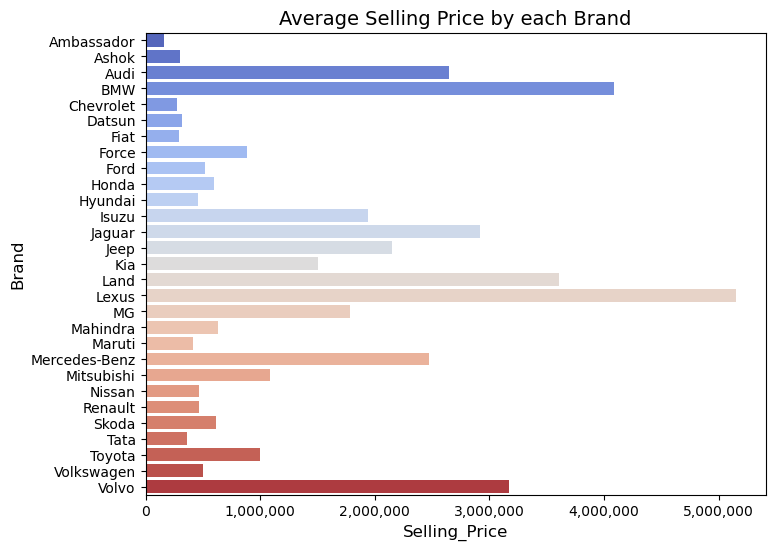

In [33]:
mean_values = df.groupby('Brand')['selling_price'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(y='Brand', x='selling_price', data=mean_values, palette='coolwarm')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: format(int(x), ',')))
plt.xlabel("Selling_Price", fontsize=12)
plt.ylabel("Brand", fontsize=12)
plt.title("Average Selling Price by each Brand", fontsize=14)
plt.show()

# Car brand vs Mileage

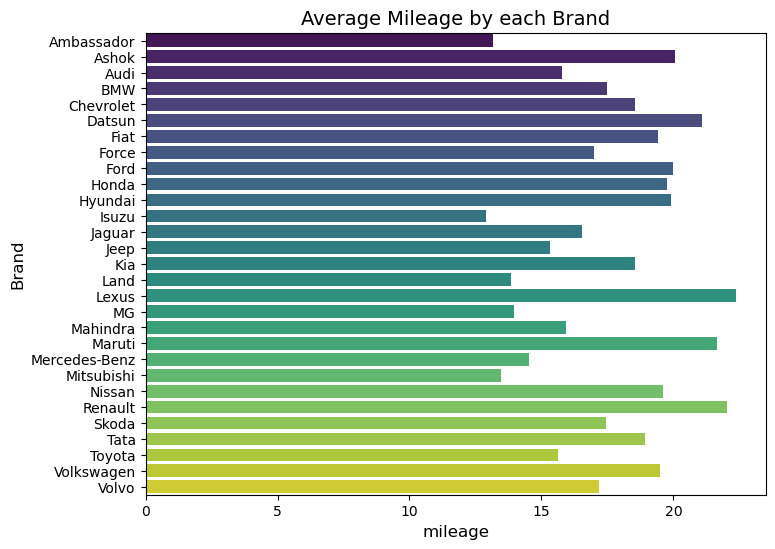

In [38]:
mean_values = df.groupby('Brand')['mileage'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(y='Brand', x='mileage', data=mean_values, palette = 'viridis' )
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: format(int(x), ',')))
plt.xlabel("mileage", fontsize=12)
plt.ylabel("Brand", fontsize=12)
plt.title("Average Mileage by each Brand", fontsize=14)
plt.show()